# NBA Success EDA Dashboard

This notebook provides an exploratory data analysis (EDA) dashboard for the NBA success dataset, focusing on the predictors and target used in model training. All plots are displayed inline.

In [3]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

sns.set(style="whitegrid")

In [4]:
# Load and Filter Data
data = pd.read_csv("nba_success_dataset_2010-2019.csv")
# Filter as in model_training.py
data = data[(data["Highest_WS"] >= data["Highest_WS"].quantile(0.02)) & (data["Highest_WS"] <= data["Highest_WS"].quantile(0.98))]
print(f"Data shape after filtering: {data.shape}")
data.head()

Data shape after filtering: (336, 77)


,Unnamed: 0,PLAYER,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,...,TEAM,AFFILIATION,YEAR,ROUND,ROUND.1,OVERALL,allstar_apps,Highest_WS,Highest_BPM,Overall PIE
1,1,Zion Williamson,Duke,ACC,33,64.9,129.2,28.2,70.8,70.19,...,New Orleans Pelicans,Duke,2019.0,1,1,1,0.0,8.7,5.8,12.7163
2,2,Victor Oladipo,Indiana,B10,36,70.4,122.7,22.6,64.8,67.12,...,Orlando Magic,Indiana,2013.0,1,2,2,2.0,8.2,5.8,7.6930
4,4,Denzel Valentine,Michigan St.,B10,31,72.5,125.5,28.9,57.9,60.82,...,Chicago Bulls,Michigan State,2016.0,1,14,14,0.0,2.5,-0.6,2.8370
5,5,Frank Kaminsky,Wisconsin,B10,39,81.4,126.2,28.1,59.0,62.78,...,Charlotte Hornets,Wisconsin,2015.0,1,9,9,0.0,3.6,4.9,5.5937
6,6,Willie Cauley-Stein,Kentucky,SEC,37,54.5,118.9,14.9,59.6,57.95,...,Sacramento Kings,Kentucky,2015.0,1,6,6,0.0,6.7,1.2,4.9028


In [5]:
# Define Predictors and Target
num_predictors = ["stops", "bpm", "Rec Rank", "GP", "ftr"]
cat_predictors = []
predictors = num_predictors + cat_predictors
target = "Highest_WS"

print("Numerical predictors:", num_predictors)
print("Categorical predictors:", cat_predictors)
print("Target:", target)

Numerical predictors: ['stops', 'bpm', 'Rec Rank', 'GP', 'ftr']
Categorical predictors: []
Target: Highest_WS


## Distribution Plots for Predictors and Target

Visualize the distribution of each predictor and the target variable using histograms with KDE.

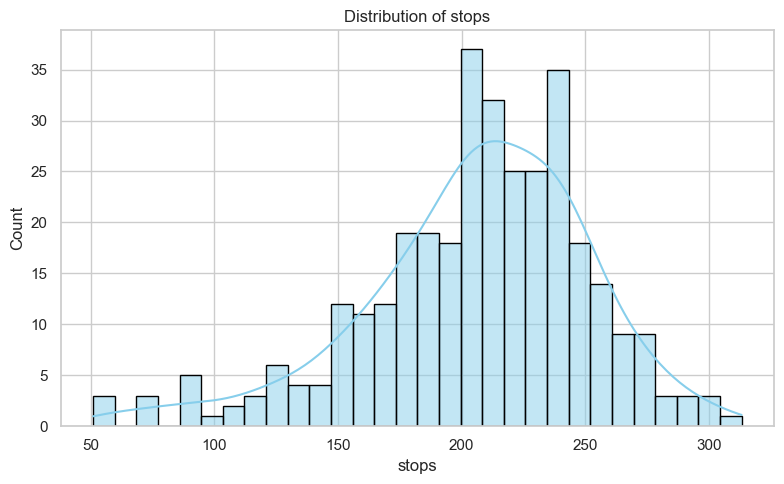

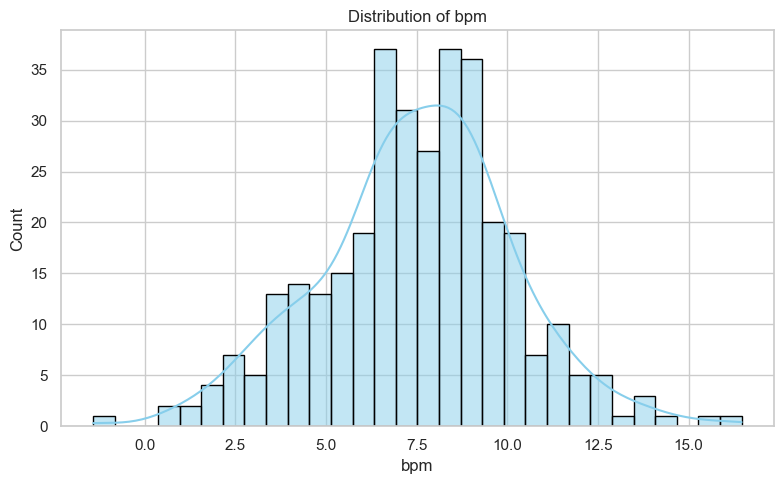

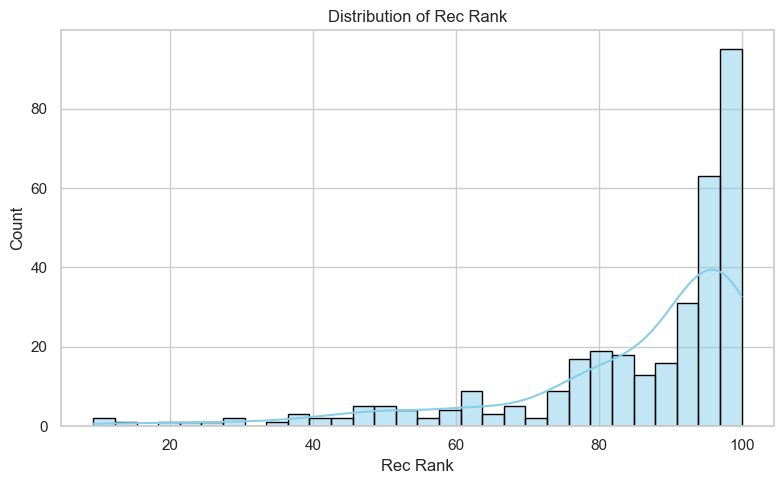

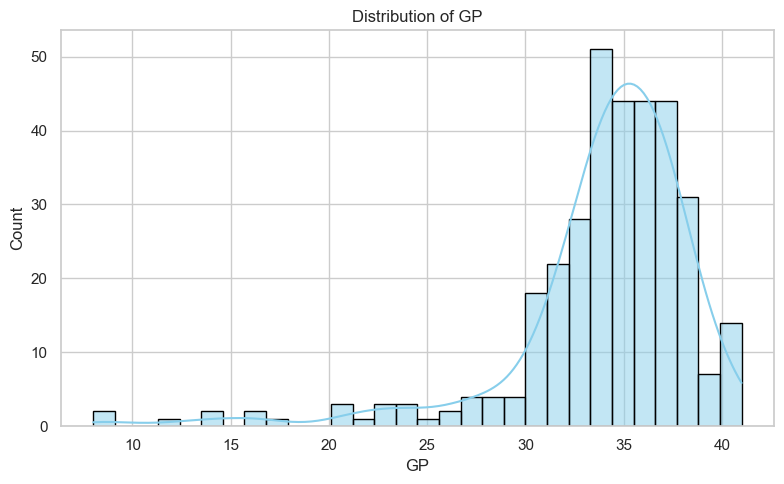

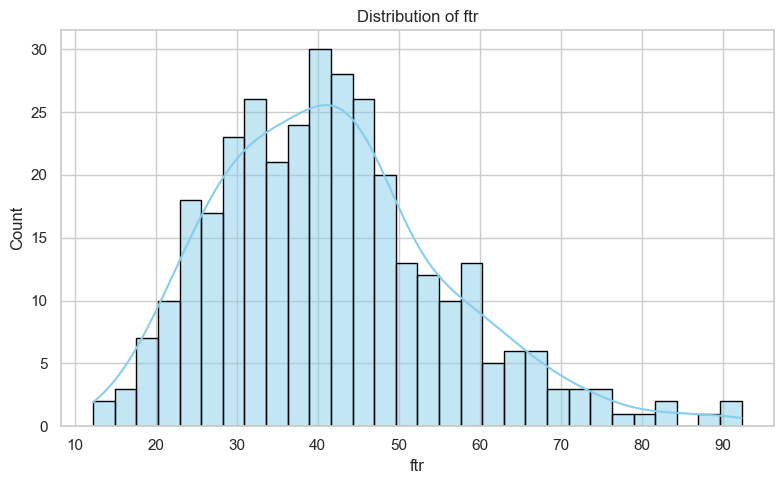

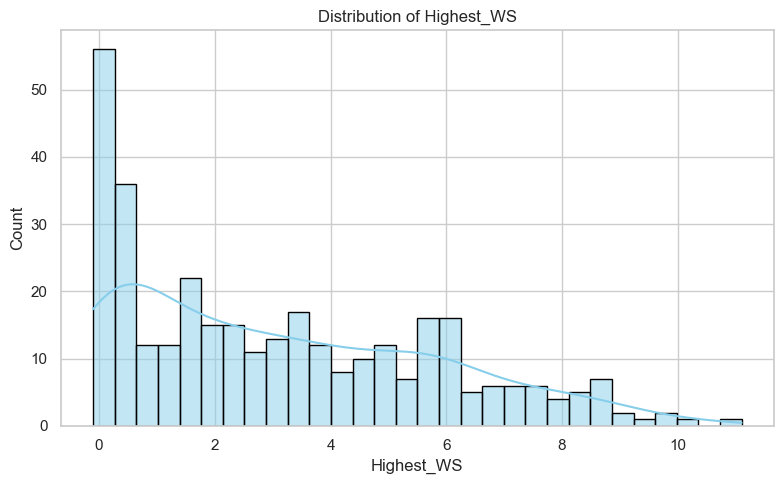

In [6]:
# Distribution plots for predictors and target
for col in predictors + [target]:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

## Scatter Plots: Each Predictor vs Target

Visualize the relationship between each predictor and the target variable using scatter plots.

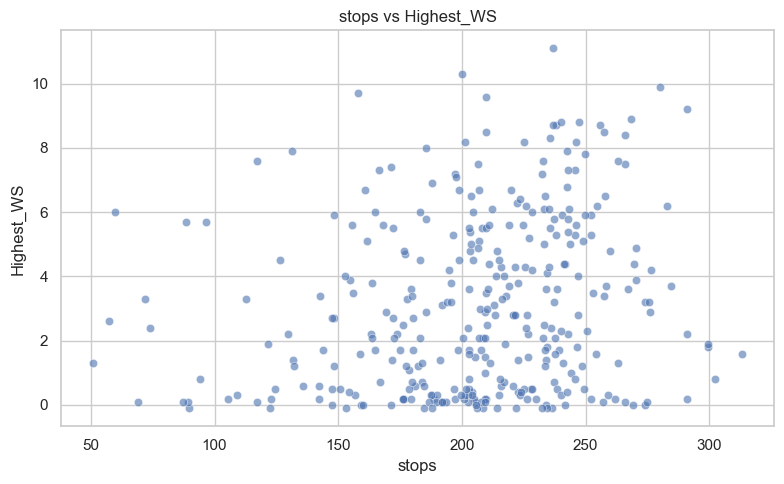

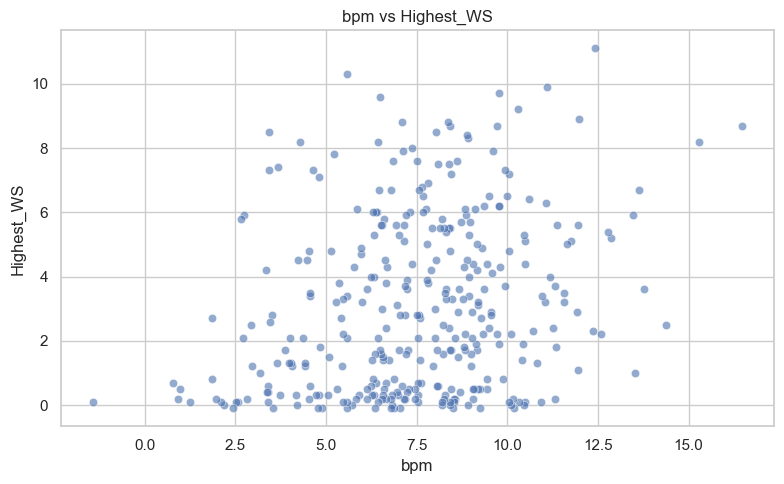

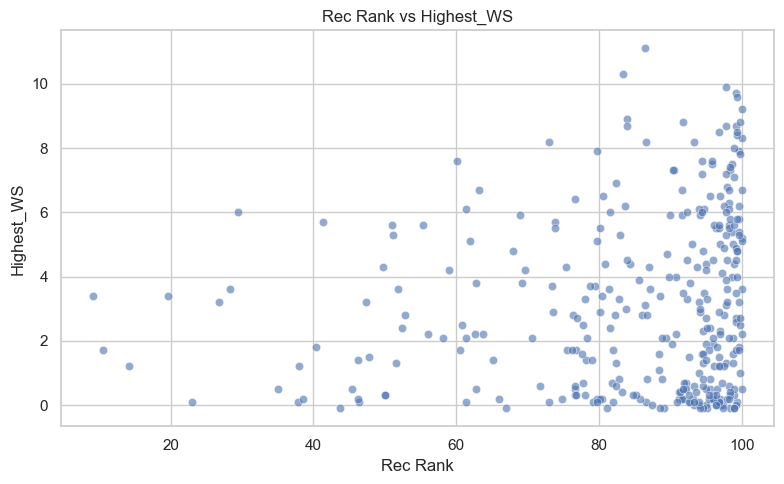

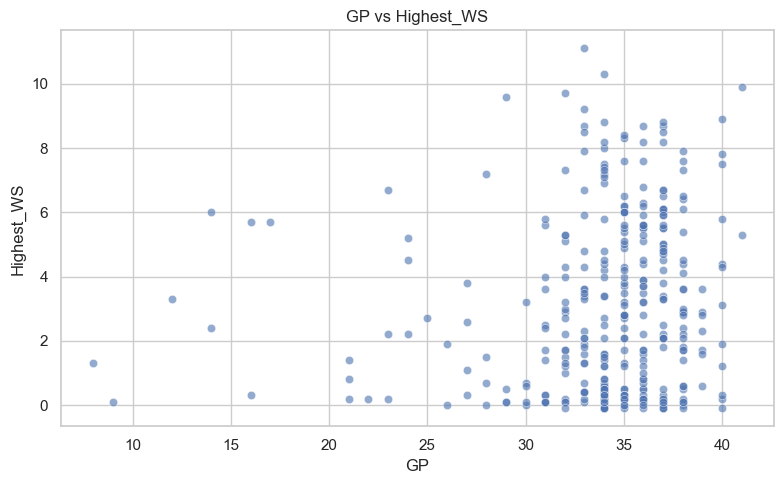

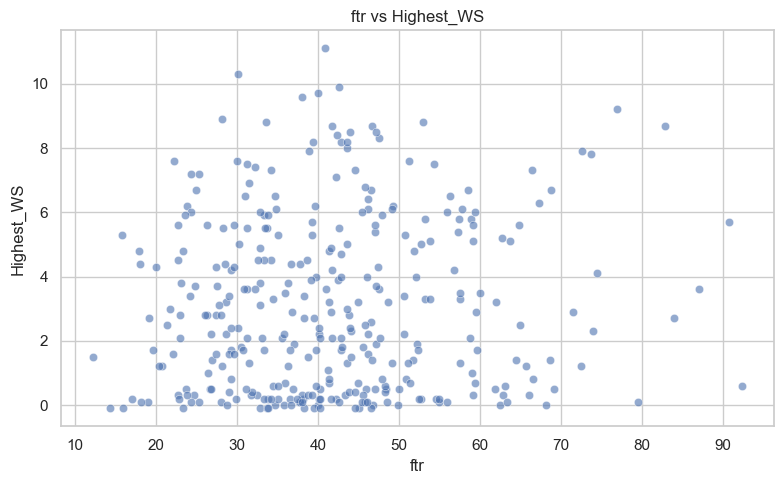

In [7]:
# Scatter plots: each predictor vs target
for col in predictors:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data[col], y=data[target], alpha=0.6)
    plt.title(f"{col} vs {target}")
    plt.xlabel(col)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()

## Correlation Matrix Heatmap

Display the correlation matrix for all predictors and the target as a heatmap.

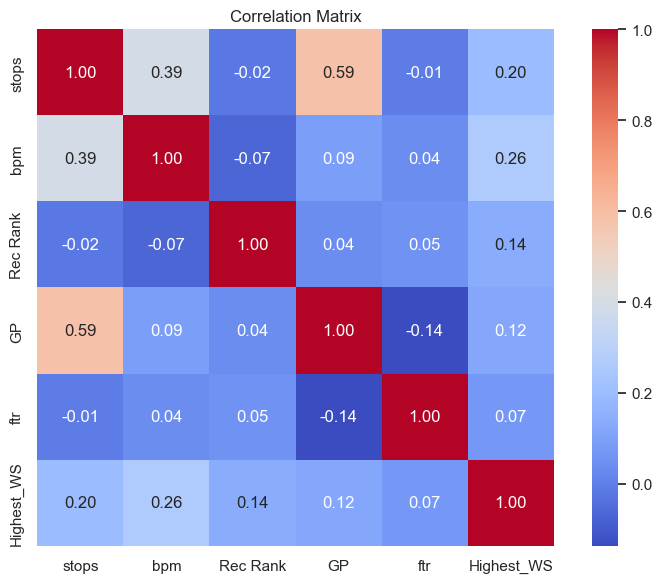

In [8]:
# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
corr = data[predictors + [target]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

## Pairplot for All Predictors and Target

Visualize pairwise relationships between all predictors and the target using a pairplot.

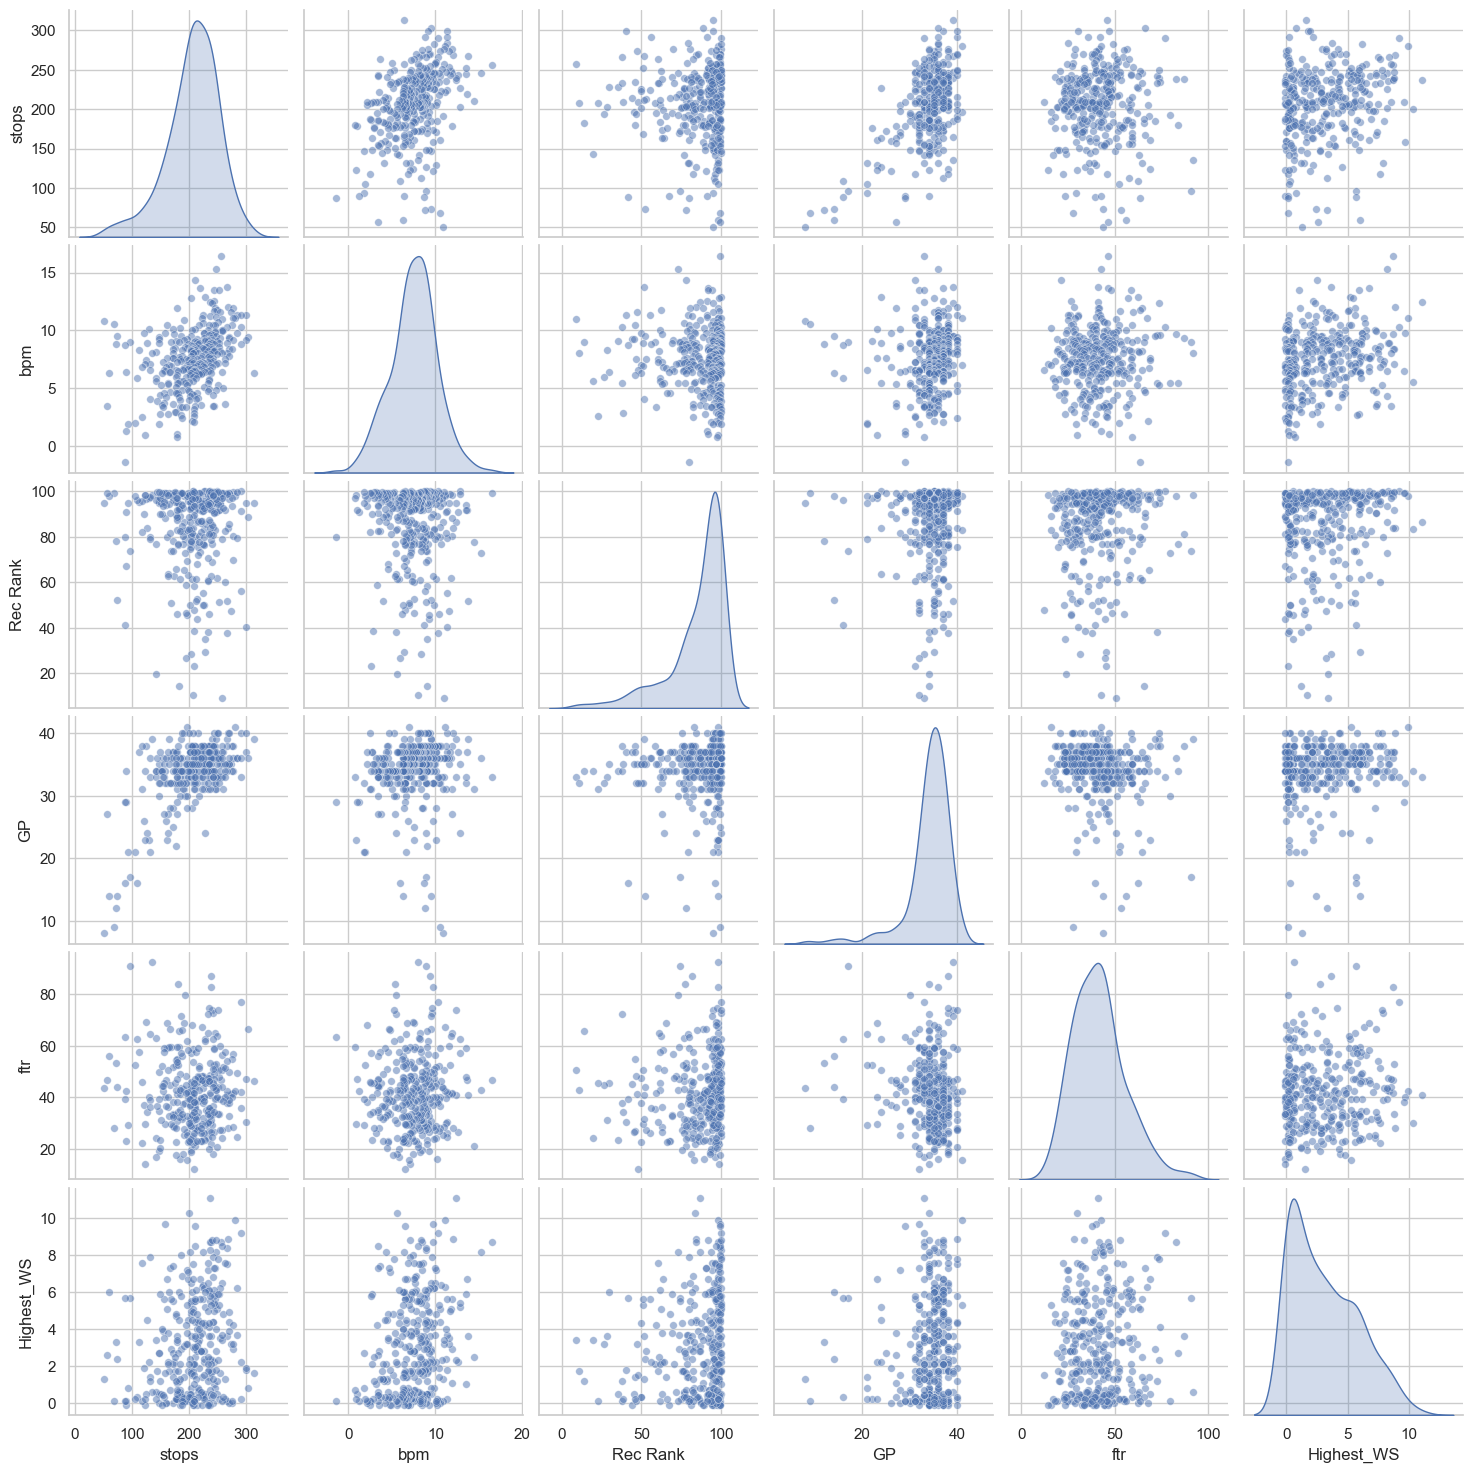

In [9]:
# Pairplot for all predictors and target
sns.pairplot(data[predictors + [target]], diag_kind='kde', plot_kws={'alpha':0.5, 's':30})
plt.show()

## Boxplots of Predictors Grouped by Target Quartiles

Visualize the distribution of each predictor grouped by quartiles of the target variable using boxplots.

C:\Users\Franklin\AppData\Local\Temp\ipykernel_13300\1010521568.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=quartiles, y=data[col], palette='Set2')


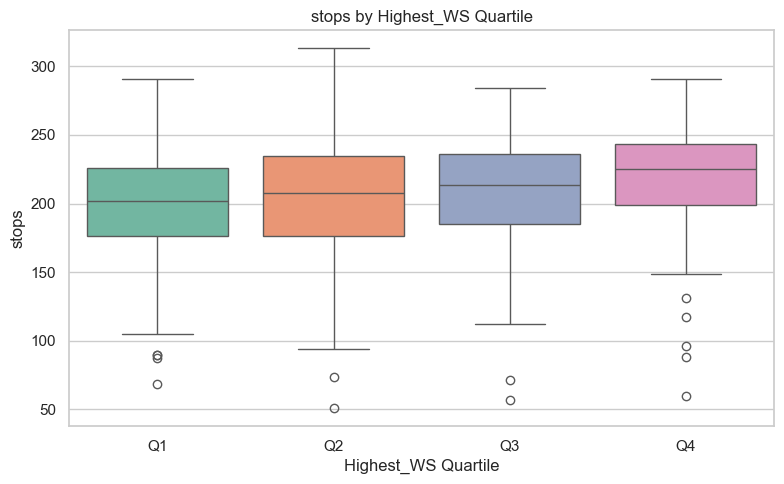

C:\Users\Franklin\AppData\Local\Temp\ipykernel_13300\1010521568.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=quartiles, y=data[col], palette='Set2')


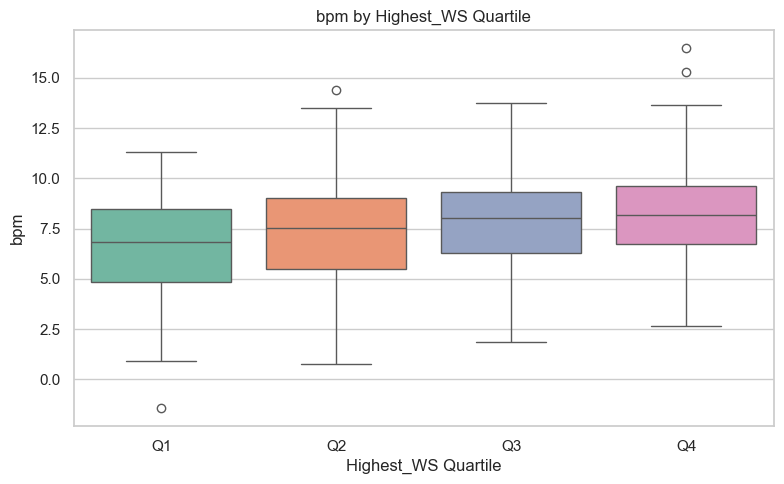

C:\Users\Franklin\AppData\Local\Temp\ipykernel_13300\1010521568.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=quartiles, y=data[col], palette='Set2')


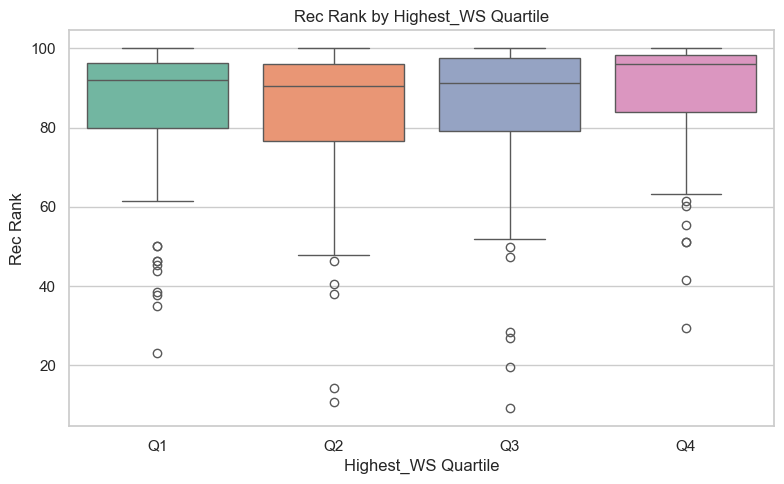

C:\Users\Franklin\AppData\Local\Temp\ipykernel_13300\1010521568.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=quartiles, y=data[col], palette='Set2')


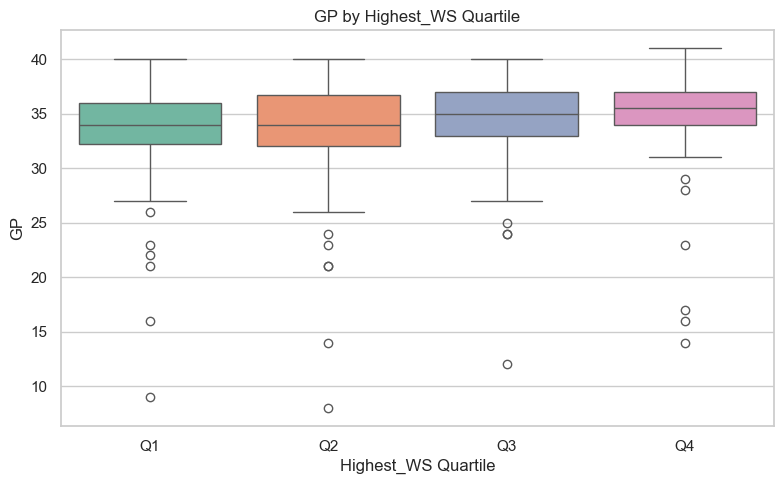

C:\Users\Franklin\AppData\Local\Temp\ipykernel_13300\1010521568.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=quartiles, y=data[col], palette='Set2')


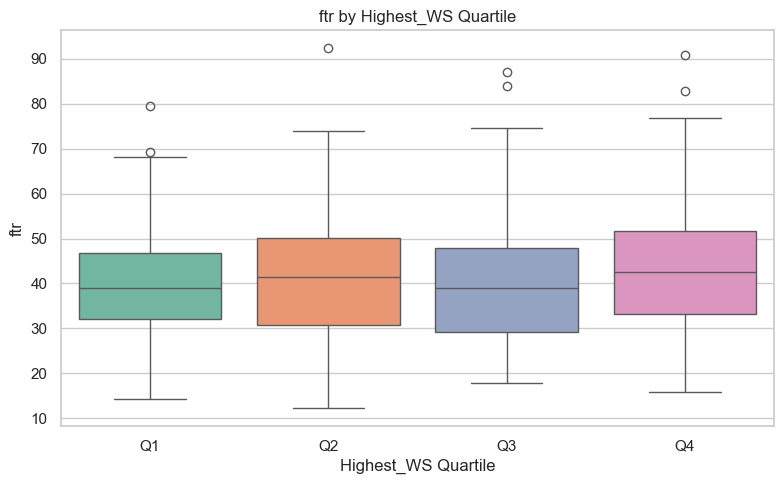

In [10]:
# Boxplots of predictors grouped by target quartiles
quartiles = pd.qcut(data[target], 4, labels=["Q1", "Q2", "Q3", "Q4"])
for col in predictors:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=quartiles, y=data[col], palette='Set2')
    plt.title(f"{col} by {target} Quartile")
    plt.xlabel(f"{target} Quartile")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()